In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, classification_report, f1_score, recall_score,precision_score
import pickle
from collections import defaultdict

In [3]:
def read_results(folder, cycle,psuedo_label=False):
    base_path = '/Volumes/data01/waitsun/result_data_analysis'
    true_label = np.load(f'{base_path}/{folder}/{folder}_{cycle}_truth_label.npy')
    pred_label = np.load(f'{base_path}/{folder}/{folder}_{cycle}_prediction_label.npy')
    # scores_label = np.load(f'{base_path}/{folder}/{folder}_{cycle}_scores_label.npy')
    # labeled_indices = np.load(f'{base_path}/{folder}/{folder}_{cycle}_labeled_indices.npy')<

    if psuedo_label:
        psuedo_label = np.load(f'{base_path}/{folder}/{folder}_{cycle}_psuedo_label.npy')
        return [true_label, pred_label, psuedo_label]
    return [true_label, pred_label]

In [4]:
results_all = {'coreset':{'avg':[],'std':[]}, 
               'random':{'avg':[],'std':[]}, 
               'label_dispersion':{'avg':[],'std':[]},
               'corelb':{'avg':[],'std':[]},
               'corelbpseudo':{'avg':[],'std':[]},
               }

results_all = defaultdict(lambda: defaultdict(dict))
for i in ['coreset','random','label_dispersion','corelb','corelbpseudo','all','coreset_adv_sampling','label_dispersion_adv_sampling','corelbpseudo_full_epochs','coreset_full_epochs','coreset_full_aug_epochs']:
    for j in ['acc','bal_acc','f1','recall','precision']:
        for k in ['avg','std']:
            results_all[i][j][k] = None



In [5]:
def get_results(rnd_ids):
    random_results_per_id = []
    for rnd_id in rnd_ids:
        random_results = {'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
        for i in range(10):
            results = read_results(f'SnapshotSerengetiSmall_mobyv2al_{rnd_id}',cycle=i)
            random_results['true_label'].append(results[0])
            random_results['pred_label'].append(results[1])

        random_history = {'acc':[],'bal_acc':[],'f1':[],'recall':[],'precision':[]}
        for i in range(10):
            x = accuracy_score(random_results['true_label'][i], random_results['pred_label'][i])
            random_history['acc'].append(x)
            x = balanced_accuracy_score(random_results['true_label'][i], random_results['pred_label'][i])
            random_history['bal_acc'].append(x)
            x = f1_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
            random_history['f1'].append(x)
            x = recall_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
            random_history['recall'].append(x)
            x = precision_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
            random_history['precision'].append(x)

        random_results_per_id.append(random_history)
    return random_results_per_id

def get_results_from_sst_random(rnd_ids):
    random_results_per_id = []
    for rnd_id in rnd_ids:
        random_results = {'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
        results = read_results(f'SnapshotSerengetiSmall_Random_{rnd_id}',cycle=0)
        random_results['true_label'].append(results[0])
        random_results['pred_label'].append(results[1])

    random_history = {'acc':[],'bal_acc':[],'f1':[],'recall':[],'precision':[]}
    for _ in range(10):
        i = 0
        x = accuracy_score(random_results['true_label'][i], random_results['pred_label'][i])
        random_history['acc'].append(x)
        x = balanced_accuracy_score(random_results['true_label'][i], random_results['pred_label'][i])
        random_history['bal_acc'].append(x)
        x = f1_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
        random_history['f1'].append(x)
        x = recall_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
        random_history['recall'].append(x)
        x = precision_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
        random_history['precision'].append(x)

    random_results_per_id.append(random_history)
    return random_results_per_id

In [124]:
tmp_path = '/Volumes/data01/waitsun/result_data_analysis/SnapshotSerengetiSmall_mobyv2al_20240706'
high_lb_indices = []
labeled_indices = []
pseudo_labels = []
label_dispersion_indices = []
for i in range(4):    
    with open(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240706_{i}_high_lb_indices.pkl', 'rb') as f:
        high_lb_indices.append(pickle.load(f))
    with open(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240706_{i}_pseudo_labels.pkl', 'rb') as f:
        pseudo_labels.append(pickle.load(f))
    with open(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240706_{i}_labeldispersion_indices.pkl', 'rb') as f:
        label_dispersion_indices.append(pickle.load(f))

    labeled_indices.append(np.load(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240706_{i}_labeled_indices.npy'))



In [6]:
for i in range(4):
    print(len(high_lb_indices[i].keys()))

60738
158718
188059
30365


In [8]:
c=0
for i in list(high_lb_indices[0].keys()):
    tmp = label_dispersion_indices[0][i]
    if tmp[0] != tmp[-1]:
        c+=1

print(c)
print(len(high_lb_indices[0]))

2351
60738


In [6]:
# random 
rnd_ids = [20240618, 20240619, 20240704] #20240703
random_results_per_id = get_results(rnd_ids)

results_all['random']['acc']['avg'] = np.mean([i['acc'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['acc']['std'] = np.std([i['acc'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['bal_acc']['std'] = np.std([i['bal_acc'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['precision']['avg'] = np.mean([i['precision'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['precision']['std'] = np.std([i['precision'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['recall']['avg'] = np.mean([i['recall'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['recall']['std'] = np.std([i['recall'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['f1']['avg'] = np.mean([i['f1'] for i in random_results_per_id],axis=0).tolist()
results_all['random']['f1']['std'] = np.std([i['f1'] for i in random_results_per_id],axis=0).tolist()

all_ids = [20240707]
all_results_per_id = get_results_from_sst_random(all_ids)
results_all['all']['acc']['avg'] = np.mean([i['acc'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['acc']['std'] = np.std([i['acc'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['bal_acc']['std'] = np.std([i['bal_acc'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['precision']['avg'] = np.mean([i['precision'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['precision']['std'] = np.std([i['precision'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['recall']['avg'] = np.mean([i['recall'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['recall']['std'] = np.std([i['recall'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['f1']['avg'] = np.mean([i['f1'] for i in all_results_per_id],axis=0).tolist()
results_all['all']['f1']['std'] = np.std([i['f1'] for i in all_results_per_id],axis=0).tolist()

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wai

In [7]:
# label dispersion
lb_results ={'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
lbs_ids = [20240624,20240621,20240611]
lb_resuilts_per_id = get_results(lbs_ids)

results_all['label_dispersion']['acc']['avg'] = np.mean([i['acc'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['acc']['std'] = np.std([i['acc'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['bal_acc']['std'] = np.std([i['bal_acc'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['precision']['avg'] = np.mean([i['precision'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['precision']['std'] = np.std([i['precision'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['recall']['avg'] = np.mean([i['recall'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['recall']['std'] = np.std([i['recall'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['f1']['avg'] = np.mean([i['f1'] for i in lb_resuilts_per_id],axis=0).tolist()
results_all['label_dispersion']['f1']['std'] = np.std([i['f1'] for i in lb_resuilts_per_id],axis=0).tolist()

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wai

In [8]:
# coreset
coreset_results ={'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
coreset_ids = [20240620,20240623,20240615]
coreset_results_per_id = get_results(coreset_ids)

results_all['coreset']['acc']['avg'] = np.mean([i['acc'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['acc']['std'] = np.std([i['acc'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['bal_acc']['std'] = np.std([i['bal_acc'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['precision']['avg'] = np.mean([i['precision'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['precision']['std'] = np.std([i['precision'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['recall']['avg'] = np.mean([i['recall'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['recall']['std'] = np.std([i['recall'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['f1']['avg'] = np.mean([i['f1'] for i in coreset_results_per_id],axis=0).tolist()
results_all['coreset']['f1']['std'] = np.std([i['f1'] for i in coreset_results_per_id],axis=0).tolist()

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wai

In [ ]:
# corelbpseudo
corelbpseudo_ids = [20240706,20240708,20240722,20240711] 
corelbpseudo_results_per_id = get_results(corelbpseudo_ids)
results_all['corelbpseudo']['acc']['avg'] = np.mean([i['acc'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['acc']['std'] = np.std([i['acc'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['bal_acc']['std'] = np.std([i['bal_acc'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['precision']['avg'] = np.mean([i['precision'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['precision']['std'] = np.std([i['precision'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['recall']['avg'] = np.mean([i['recall'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['recall']['std'] = np.std([i['recall'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['f1']['avg'] = np.mean([i['f1'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all['corelbpseudo']['f1']['std'] = np.std([i['f1'] for i in corelbpseudo_results_per_id],axis=0).tolist()


# corelbpseudo_human_labeled_ids = [20240713]
# corelbpseudo_human_labeled_results_per_id = get_results(corelbpseudo_human_labeled_ids)
# results_all['corelbpseudo_human_labeled']['acc']['avg'] = np.mean([i['acc'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['acc']['std'] = np.std([i['acc'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['bal_acc']['std'] = np.std([i['bal_acc'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['precision']['avg'] = np.mean([i['precision'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['precision']['std'] = np.std([i['precision'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['recall']['avg'] = np.mean([i['recall'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['recall']['std'] = np.std([i['recall'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['f1']['avg'] = np.mean([i['f1'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()
# results_all['corelbpseudo_human_labeled']['f1']['std'] = np.std([i['f1'] for i in corelbpseudo_human_labeled_results_per_id],axis=0).tolist()


In [10]:
# corelb
corelb_results ={'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
corelb_ids = [20240622,20240610,20240629]
corelb_results_per_id = get_results(corelb_ids)

results_all['corelb']['acc']['avg'] = np.mean([i['acc'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['acc']['std'] = np.std([i['acc'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['bal_acc']['std'] = np.std([i['bal_acc'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['precision']['avg'] = np.mean([i['precision'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['precision']['std'] = np.std([i['precision'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['recall']['avg'] = np.mean([i['recall'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['recall']['std'] = np.std([i['recall'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['f1']['avg'] = np.mean([i['f1'] for i in corelb_results_per_id],axis=0).tolist()
results_all['corelb']['f1']['std'] = np.std([i['f1'] for i in corelb_results_per_id],axis=0).tolist()
    

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wai

In [11]:
# coreset_adv_sampling
coreset_adv_sampling_results ={'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
coreset_adv_sampling_ids = [20240702,20240739,20240740]
coreset_adv_sampling_results_per_id = get_results(coreset_adv_sampling_ids)

results_all['coreset_adv_sampling']['acc']['avg'] = np.mean([i['acc'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['acc']['std'] = np.std([i['acc'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['bal_acc']['std'] = np.std([i['bal_acc'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['precision']['avg'] = np.mean([i['precision'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['precision']['std'] = np.std([i['precision'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['recall']['avg'] = np.mean([i['recall'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['recall']['std'] = np.std([i['recall'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['f1']['avg'] = np.mean([i['f1'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()
results_all['coreset_adv_sampling']['f1']['std'] = np.std([i['f1'] for i in coreset_adv_sampling_results_per_id],axis=0).tolist()

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wai

In [216]:
results_all['coreset_adv_sampling']

defaultdict(dict,
            {'acc': {'avg': [0.7325161794648052,
               0.6970904232111693,
               0.7669339005235601,
               0.7799420084351367,
               0.793562754508435,
               0.7935091259453171,
               0.8120200698080279,
               0.8182827952297848,
               0.8343831806282722,
               0.8210087623618382],
              'std': [0.02697114680429472,
               0.03385325487693087,
               0.019499881963747738,
               0.01763979326780404,
               0.02394074239732679,
               0.025417569814065465,
               0.0187313484773905,
               0.007882962627516928,
               0.005514968300880181,
               0.018247902232568003]},
             'bal_acc': {'avg': [0.18099596892205172,
               0.19600384902304527,
               0.24757798084173133,
               0.2648015752330159,
               0.2889537409511607,
               0.3043585971219236,
              

In [15]:
# label_disperion_adv_sampling
label_dispersion_adv_sampling_results ={'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
label_dispersion_adv_sampling_ids = [20240701,20240742,20240743]
label_dispersion_adv_sampling_results_per_id = get_results(label_dispersion_adv_sampling_ids)

results_all['label_dispersion_adv_sampling']['acc']['avg'] = np.mean([i['acc'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['acc']['std'] = np.std([i['acc'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['bal_acc']['std'] = np.std([i['bal_acc'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['precision']['avg'] = np.mean([i['precision'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['precision']['std'] = np.std([i['precision'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['recall']['avg'] = np.mean([i['recall'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['recall']['std'] = np.std([i['recall'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['f1']['avg'] = np.mean([i['f1'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()
results_all['label_dispersion_adv_sampling']['f1']['std'] = np.std([i['f1'] for i in label_dispersion_adv_sampling_results_per_id],axis=0).tolist()

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wai

In [16]:
# coreset_222e
coreset_full_epochs_ids =[20240730,20240731, 20240726]
coreset_full_epochs_results_per_id = get_results(coreset_full_epochs_ids)

results_all['coreset_full_epochs']['acc']['avg'] = np.mean([i['acc'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['acc']['std'] = np.std([i['acc'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['bal_acc']['std'] = np.std([i['bal_acc'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['precision']['avg'] = np.mean([i['precision'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['precision']['std'] = np.std([i['precision'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['recall']['avg'] = np.mean([i['recall'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['recall']['std'] = np.std([i['recall'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['f1']['avg'] = np.mean([i['f1'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_epochs']['f1']['std'] = np.std([i['f1'] for i in coreset_full_epochs_results_per_id],axis=0).tolist()

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wai

In [214]:
with open('coreset_full_aug_dict.pkl', 'rb') as f:
    tmp = pickle.load(f)

tmp


defaultdict(dict,
            {'acc': {'avg': [0.7861338350785341,
               0.8034440445026177,
               0.8099749127399651,
               0.8082733420593369,
               0.8088541666666667,
               0.8182891579406631,
               0.8112565445026177,
               0.8192517452006981,
               0.8457460732984293,
               0.801584315008726],
              'std': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
             'bal_acc': {'avg': [0.2219070444777967,
               0.2321003624416751,
               0.24483394910142345,
               0.27096335923766957,
               0.3157201605984569,
               0.3012692441534078,
               0.33709941791219794,
               0.3103457055875104,
               0.35801085115275966,
               0.3703207737726038],
              'std': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
             'f1': {'avg': [0.7712686102209014,
               0.7861020455680416,
              

In [17]:
# coreset_222e_aug

coreset_full_aug_epochs_ids = [20240732,20240736,20240737]
coreset_full_aug_epochs_results_per_id = get_results(coreset_full_aug_epochs_ids)

results_all['coreset_full_aug_epochs']['acc']['avg'] = np.mean([i['acc'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['acc']['std'] = np.std([i['acc'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['bal_acc']['std'] = np.std([i['bal_acc'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['precision']['avg'] = np.mean([i['precision'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['precision']['std'] = np.std([i['precision'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['recall']['avg'] = np.mean([i['recall'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['recall']['std'] = np.std([i['recall'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['f1']['avg'] = np.mean([i['f1'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()
results_all['coreset_full_aug_epochs']['f1']['std'] = np.std([i['f1'] for i in coreset_full_aug_epochs_results_per_id],axis=0).tolist()


/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wai

In [18]:
for k,v in results_all.items():
    print(k,v)

coreset defaultdict(<class 'dict'>, {'acc': {'avg': [0.7263188990692262, 0.7358238801628855, 0.7717368382780686, 0.7800356311809192, 0.8048683827806865, 0.820399760034904, 0.8084651323443862, 0.825470840605003, 0.8215877690517743, 0.8395242510180337], 'std': [0.018061099562947325, 0.033013070819609774, 0.027839039564571105, 0.03188475834050737, 0.015486011721377488, 0.012985384135031088, 0.01662790702590324, 0.005235339026147827, 0.006495506741563859, 0.001207876494271457]}, 'bal_acc': {'avg': [0.19266248094612307, 0.20609295119450846, 0.2539733027239554, 0.27299389234695726, 0.300639805076075, 0.3095870067992112, 0.2991047589465798, 0.31540447176991876, 0.3478139941681187, 0.3604610864623495], 'std': [0.02393111713531451, 0.028199500222725642, 0.022271371422493292, 0.01621619931178777, 0.01665347054559165, 0.0037956883867258195, 0.013930677739028561, 0.004112694488367853, 0.007341853455658691, 0.03048349352815259]}, 'f1': {'avg': [0.7246782896622913, 0.7333588145391623, 0.771780245555

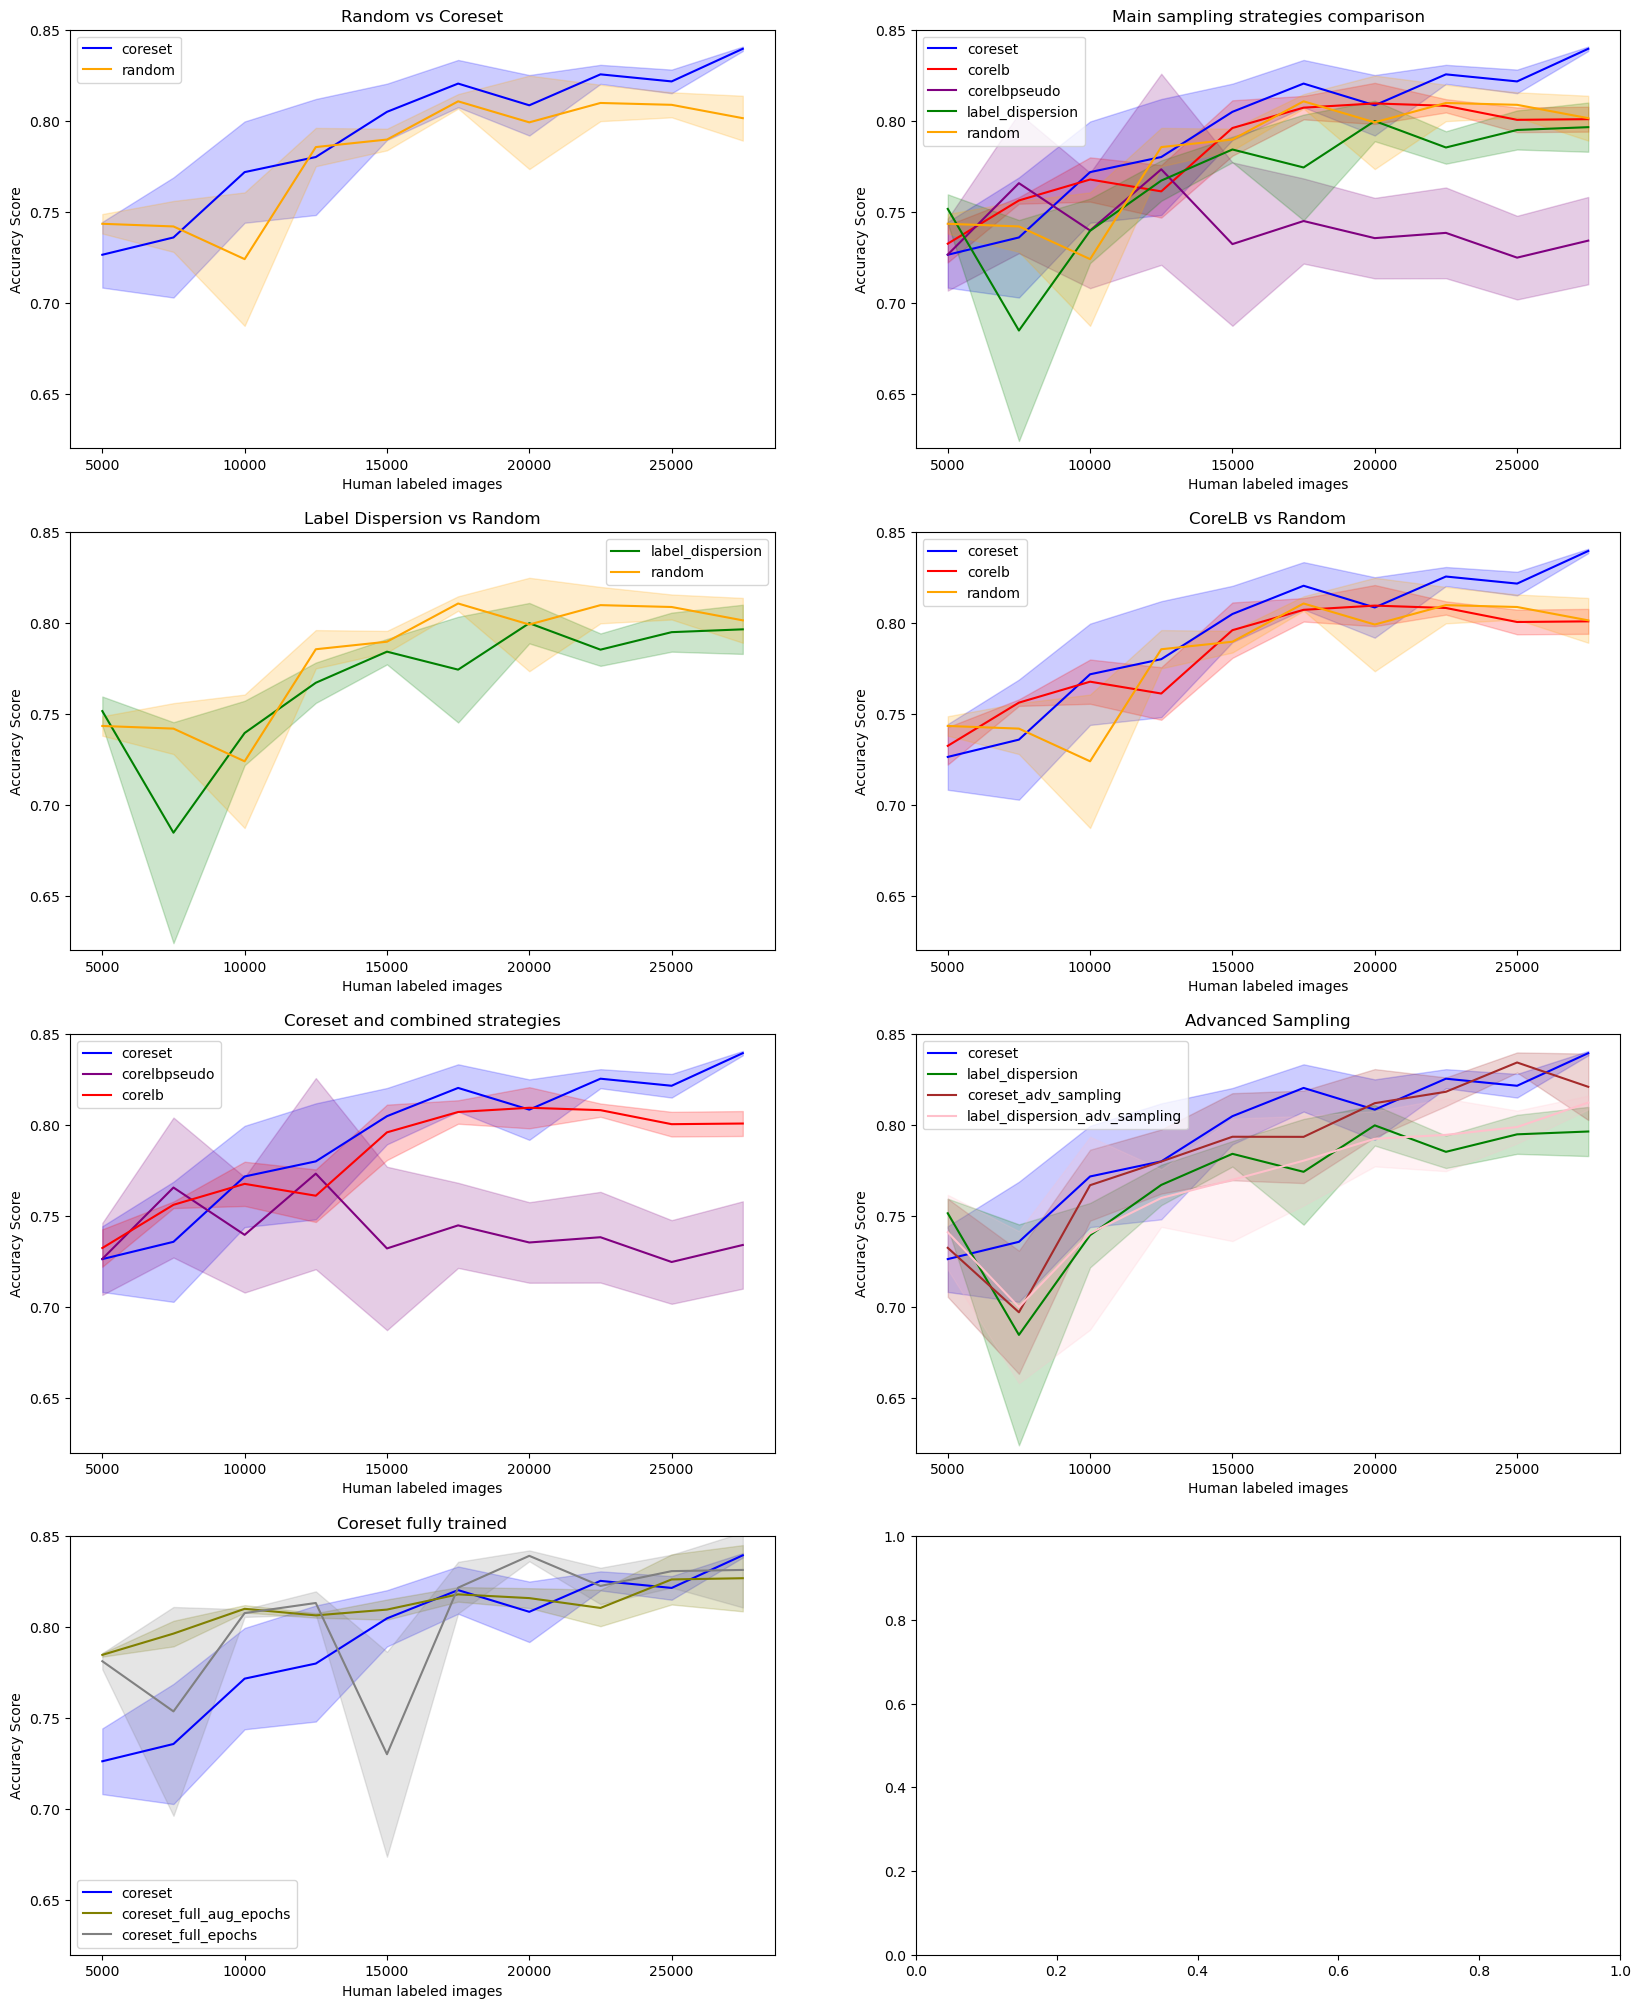

In [56]:
fig, ax = plt.subplots(4,2, figsize=(20,25))
for i in ['coreset','random']:
    ax[0,0].plot(x, results_all[i]['acc']['avg'], label=i,color=color_map[i])
    ax[0,0].fill_between(x, np.array(results_all[i]['acc']['avg'])-np.array(results_all[i]['acc']['std']), np.array(results_all[i]['acc']['avg'])+np.array(results_all[i]['acc']['std']), alpha=0.2,color=color_map[i])
ax[0,0].set_title('Random vs Coreset')

for i in ['coreset','corelb','corelbpseudo','label_dispersion','random']:
    ax[0,1].plot(x, results_all[i]['acc']['avg'], label=i, color=color_map[i])
    ax[0,1].fill_between(x, np.array(results_all[i]['acc']['avg'])-np.array(results_all[i]['acc']['std']), np.array(results_all[i]['acc']['avg'])+np.array(results_all[i]['acc']['std']), alpha=0.2,color=color_map[i])
ax[0,1].set_title('Main sampling strategies comparison')

for i in ['label_dispersion','random']:
    ax[1,0].plot(x, results_all[i]['acc']['avg'], label=i, color=color_map[i])
    ax[1,0].fill_between(x, np.array(results_all[i]['acc']['avg'])-np.array(results_all[i]['acc']['std']), np.array(results_all[i]['acc']['avg'])+np.array(results_all[i]['acc']['std']), alpha=0.2,color=color_map[i])
ax[1,0].set_title('Label Dispersion vs Random')

for i in ['coreset','corelb','random']:
    ax[1,1].plot(x, results_all[i]['acc']['avg'], label=i, color=color_map[i])
    ax[1,1].fill_between(x, np.array(results_all[i]['acc']['avg'])-np.array(results_all[i]['acc']['std']), np.array(results_all[i]['acc']['avg'])+np.array(results_all[i]['acc']['std']), alpha=0.2,color=color_map[i])
ax[1,1].set_title('CoreLB vs Random')

for i in ['coreset','corelbpseudo','corelb']:
    ax[2,0].plot(x, results_all[i]['acc']['avg'], label=i, color=color_map[i])
    ax[2,0].fill_between(x, np.array(results_all[i]['acc']['avg'])-np.array(results_all[i]['acc']['std']), np.array(results_all[i]['acc']['avg'])+np.array(results_all[i]['acc']['std']), alpha=0.2,color=color_map[i])
ax[2,0].set_title('Coreset and combined strategies')

for i in ['coreset','label_dispersion','coreset_adv_sampling','label_dispersion_adv_sampling']:
    ax[2,1].plot(x, results_all[i]['acc']['avg'], label=i, color=color_map[i])
    ax[2,1].fill_between(x, np.array(results_all[i]['acc']['avg'])-np.array(results_all[i]['acc']['std']), np.array(results_all[i]['acc']['avg'])+np.array(results_all[i]['acc']['std']), alpha=0.2,color=color_map[i])
ax[2,1].set_title('Advanced Sampling')

for i in ['coreset','coreset_full_aug_epochs','coreset_full_epochs']:
    ax[3,0].plot(x, results_all[i]['acc']['avg'], label=i, color=color_map[i])
    ax[3,0].fill_between(x, np.array(results_all[i]['acc']['avg'])-np.array(results_all[i]['acc']['std']), np.array(results_all[i]['acc']['avg'])+np.array(results_all[i]['acc']['std']), alpha=0.2,color=color_map[i])
ax[3,0].set_title('Coreset fully trained')

for index, i in enumerate(ax.flatten()):
    if index>6:
        continue
    i.set_xlabel('Human labeled images')
    i.set_ylabel('Accuracy Score')
    i.set_ylim(0.62,0.85)
    i.legend()

plt.savefig(f'plots/subdivided_accuracy.png')

In [241]:
tmp = [86,75,58,46,44,44,20]
chance_never_draw_this_class= 0
N = 1094430
for t in tmp:
    chance_never_draw_this_class *= (N-t)/N
    print(chance_never_draw_this_class)

print(chance_never_draw_this_class**5000)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


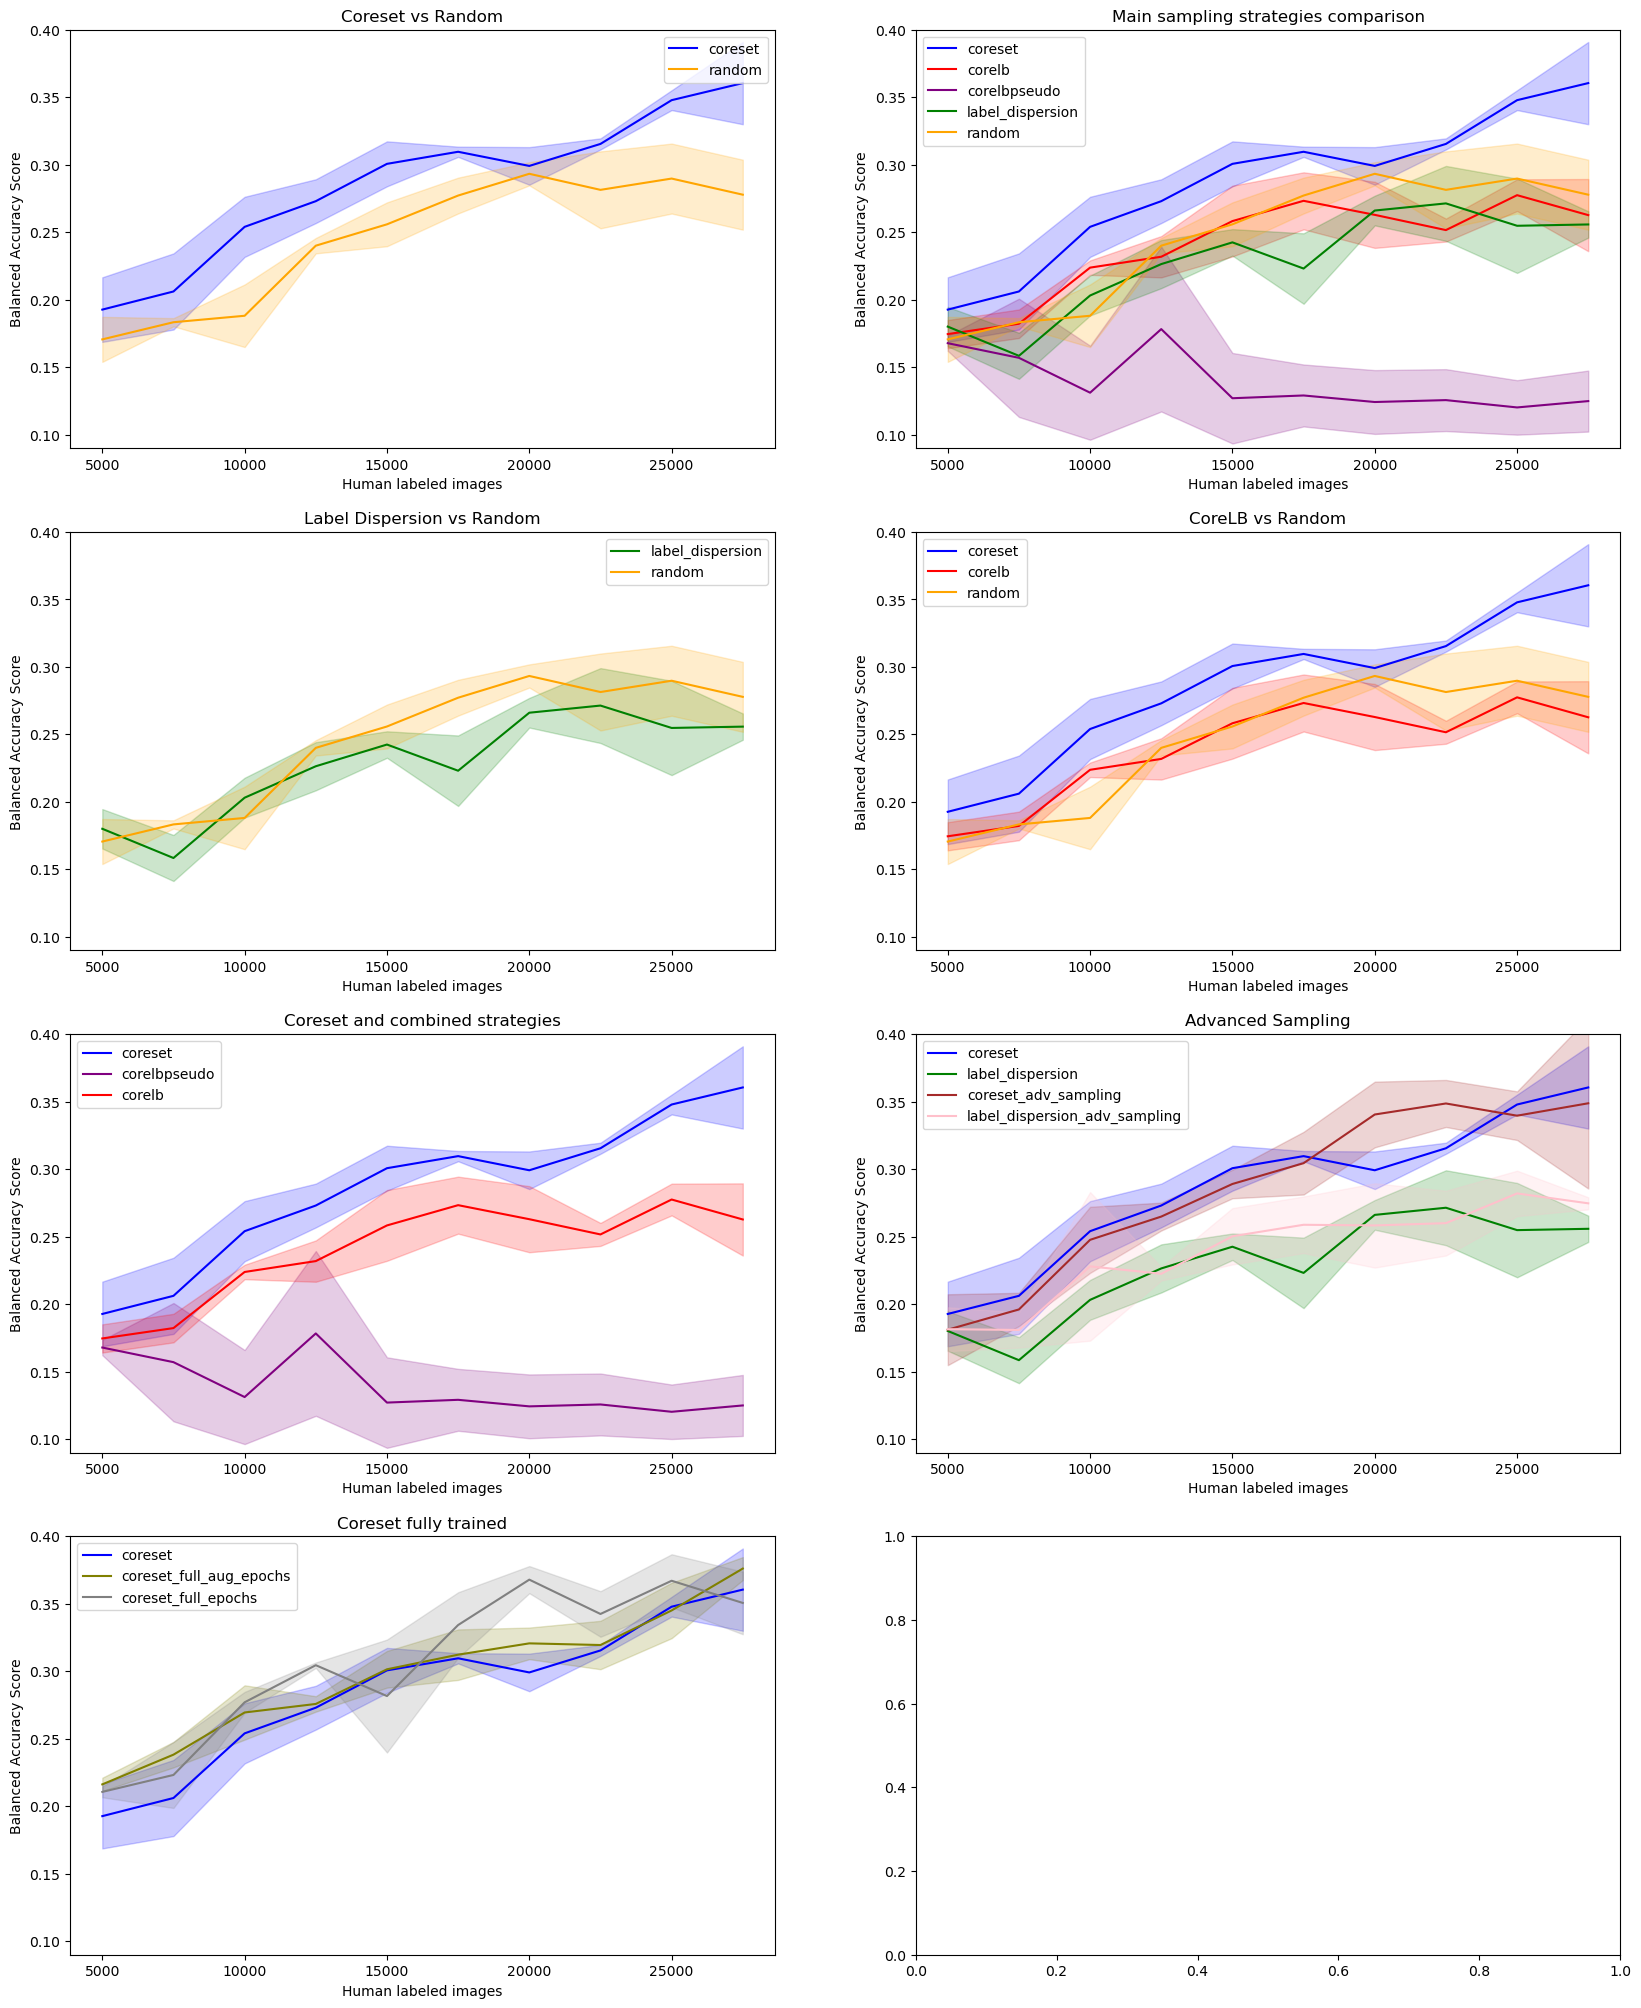

In [53]:
fig, ax = plt.subplots(4,2, figsize=(20,25))
for i in ['coreset','random']:
    ax[0,0].plot(x, results_all[i]['bal_acc']['avg'], label=i,color=color_map[i])
    ax[0,0].fill_between(x, np.array(results_all[i]['bal_acc']['avg'])-np.array(results_all[i]['bal_acc']['std']), np.array(results_all[i]['bal_acc']['avg'])+np.array(results_all[i]['bal_acc']['std']), alpha=0.2,color=color_map[i])
ax[0,0].set_title('Coreset vs Random')

for i in ['coreset','corelb','corelbpseudo','label_dispersion','random']:
    ax[0,1].plot(x, results_all[i]['bal_acc']['avg'], label=i, color=color_map[i])
    ax[0,1].fill_between(x, np.array(results_all[i]['bal_acc']['avg'])-np.array(results_all[i]['bal_acc']['std']), np.array(results_all[i]['bal_acc']['avg'])+np.array(results_all[i]['bal_acc']['std']), alpha=0.2,color=color_map[i])
ax[0,1].set_title('Main sampling strategies comparison')


for i in ['label_dispersion','random']:
    ax[1,0].plot(x, results_all[i]['bal_acc']['avg'], label=i, color=color_map[i])
    ax[1,0].fill_between(x, np.array(results_all[i]['bal_acc']['avg'])-np.array(results_all[i]['bal_acc']['std']), np.array(results_all[i]['bal_acc']['avg'])+np.array(results_all[i]['bal_acc']['std']), alpha=0.2,color=color_map[i])
ax[1,0].set_title('Label Dispersion vs Random')


for i in ['coreset','corelb','random']:
    ax[1,1].plot(x, results_all[i]['bal_acc']['avg'], label=i, color=color_map[i])
    ax[1,1].fill_between(x, np.array(results_all[i]['bal_acc']['avg'])-np.array(results_all[i]['bal_acc']['std']), np.array(results_all[i]['bal_acc']['avg'])+np.array(results_all[i]['bal_acc']['std']), alpha=0.2,color=color_map[i])
ax[1,1].set_title('CoreLB vs Random')


for i in ['coreset','corelbpseudo','corelb']:
    ax[2,0].plot(x, results_all[i]['bal_acc']['avg'], label=i, color=color_map[i])
    ax[2,0].fill_between(x, np.array(results_all[i]['bal_acc']['avg'])-np.array(results_all[i]['bal_acc']['std']), np.array(results_all[i]['bal_acc']['avg'])+np.array(results_all[i]['bal_acc']['std']), alpha=0.2,color=color_map[i])
ax[2,0].set_title('Coreset and combined strategies')



for i in ['coreset','label_dispersion','coreset_adv_sampling','label_dispersion_adv_sampling']:
    ax[2,1].plot(x, results_all[i]['bal_acc']['avg'], label=i, color=color_map[i])
    ax[2,1].fill_between(x, np.array(results_all[i]['bal_acc']['avg'])-np.array(results_all[i]['bal_acc']['std']), np.array(results_all[i]['bal_acc']['avg'])+np.array(results_all[i]['bal_acc']['std']), alpha=0.2,color=color_map[i])
ax[2,1].set_title('Advanced Sampling')

for i in ['coreset','coreset_full_aug_epochs','coreset_full_epochs']:
    ax[3,0].plot(x, results_all[i]['bal_acc']['avg'], label=i, color=color_map[i])
    ax[3,0].fill_between(x, np.array(results_all[i]['bal_acc']['avg'])-np.array(results_all[i]['bal_acc']['std']), np.array(results_all[i]['bal_acc']['avg'])+np.array(results_all[i]['bal_acc']['std']), alpha=0.2,color=color_map[i])
ax[3,0].set_title('Coreset fully trained')


for index, i in enumerate(ax.flatten()):
    if index>6:
        continue
    i.set_xlabel('Human labeled images')
    i.set_ylabel('Balanced Accuracy Score')
    i.set_ylim(0.09,0.4)
    i.legend()

plt.savefig(f'plots/subdivided_balanced_accuracy.png')

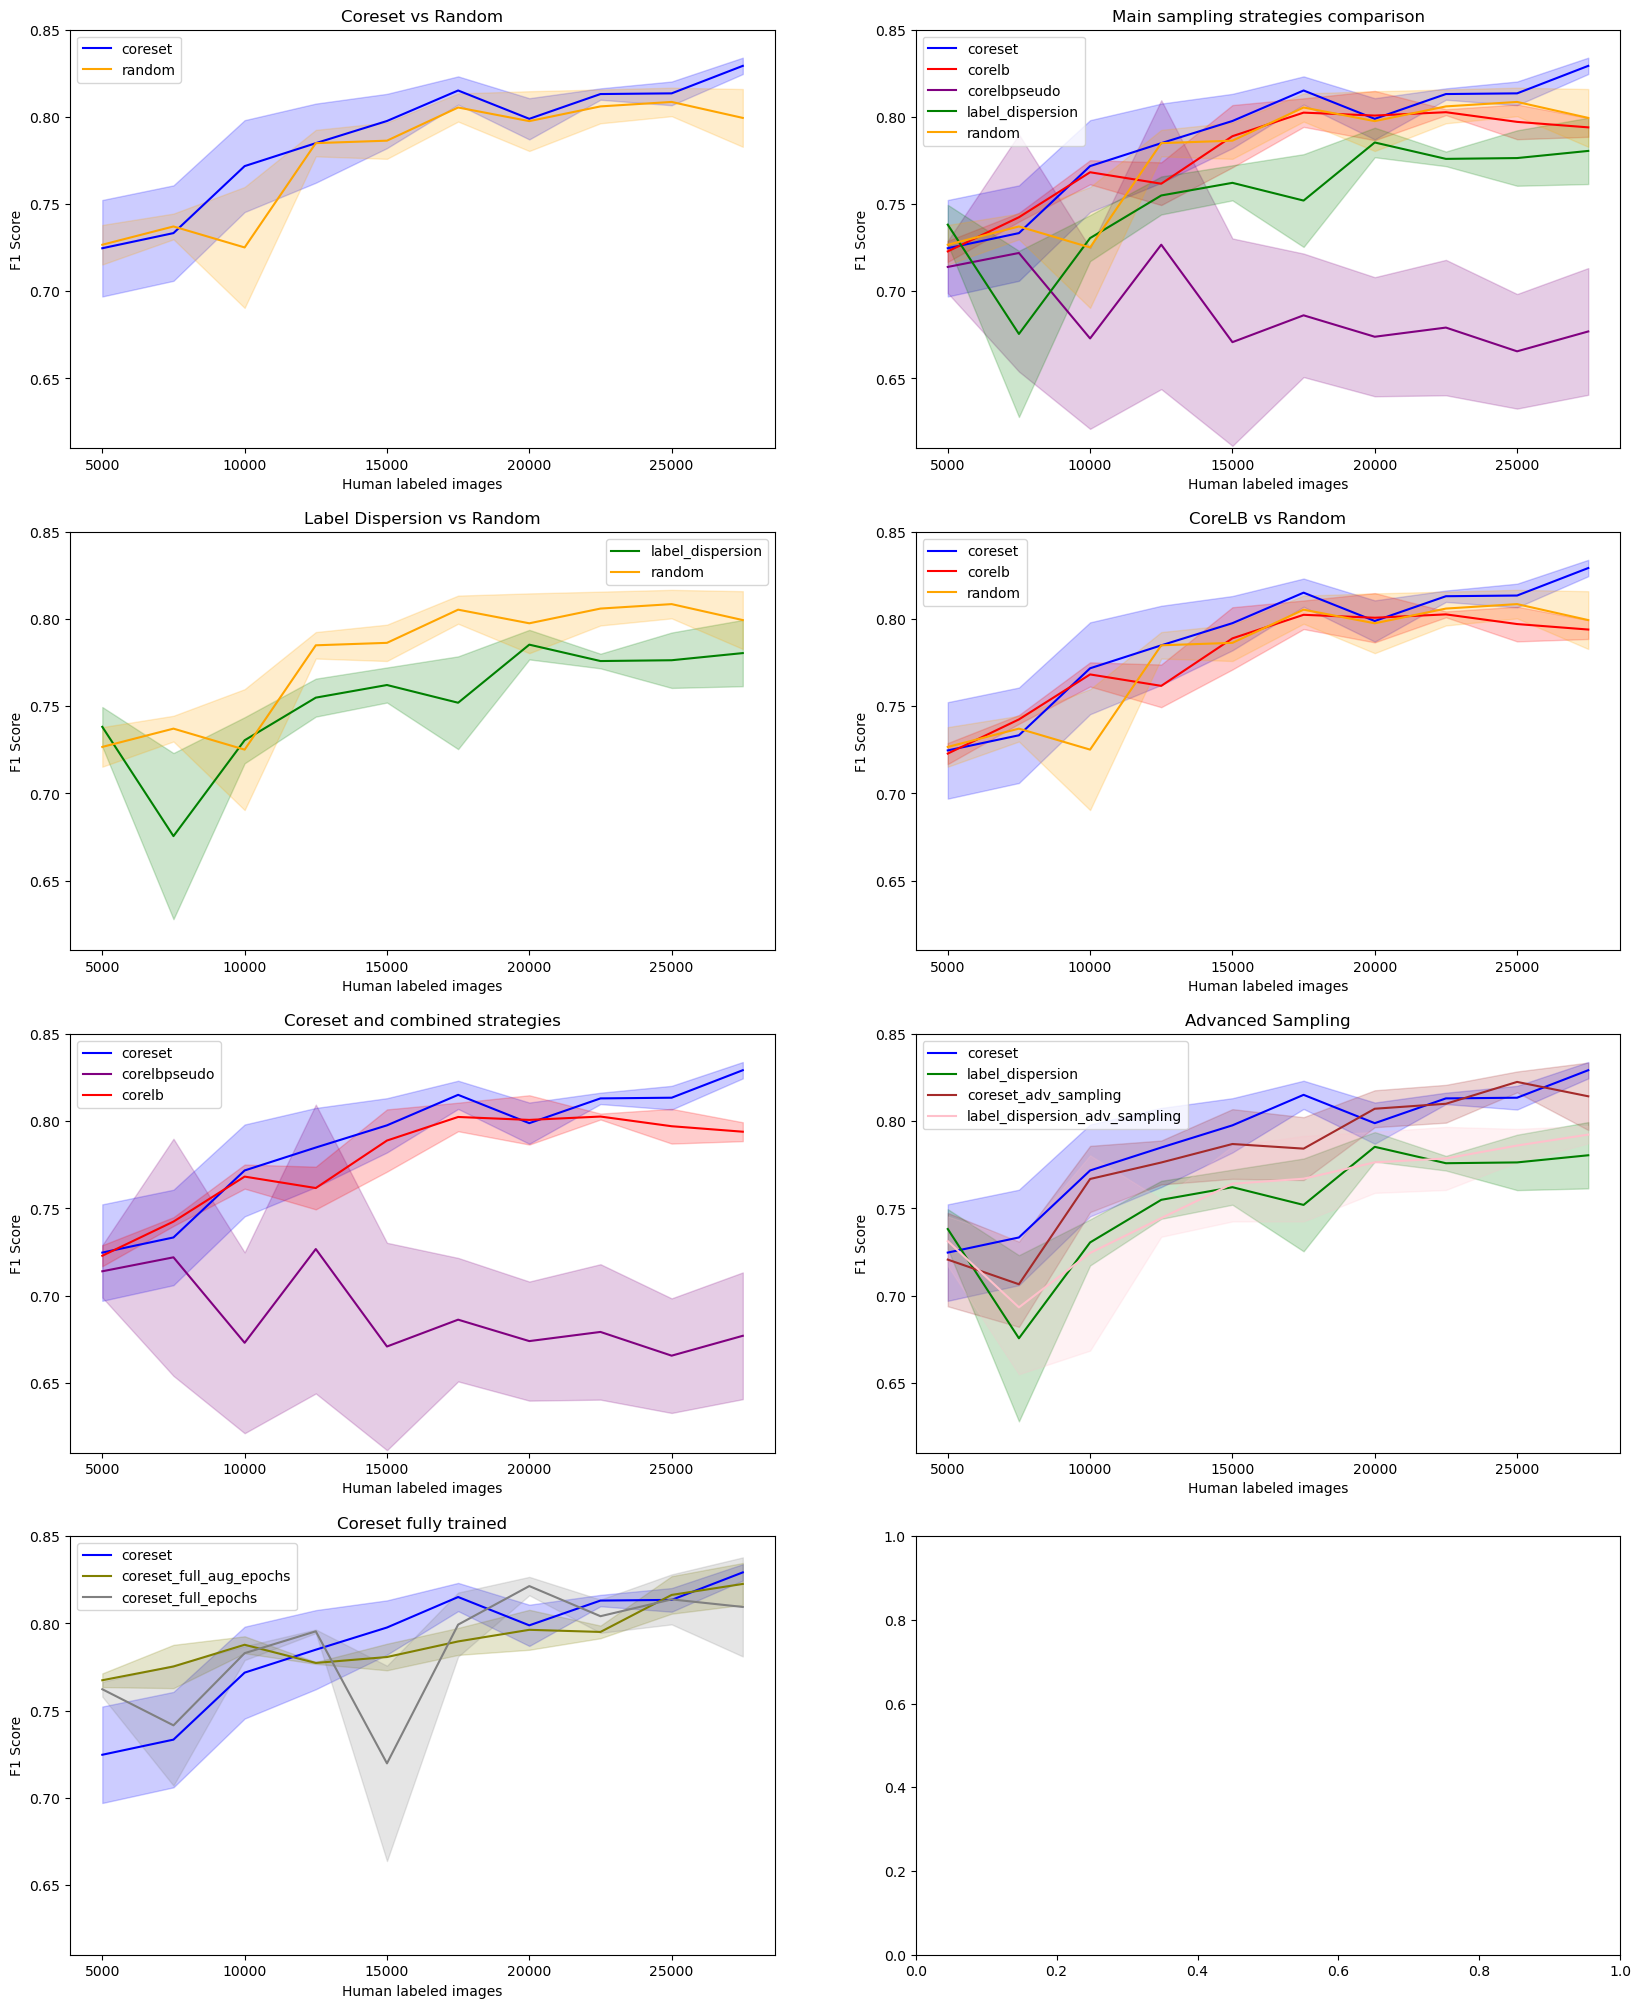

In [54]:
fig, ax = plt.subplots(4,2, figsize=(20,25))
for i in ['coreset','random']:
    ax[0,0].plot(x, results_all[i]['f1']['avg'], label=i,color=color_map[i])
    ax[0,0].fill_between(x, np.array(results_all[i]['f1']['avg'])-np.array(results_all[i]['f1']['std']), np.array(results_all[i]['f1']['avg'])+np.array(results_all[i]['f1']['std']), alpha=0.2,color=color_map[i])
ax[0,0].set_title('Coreset vs Random')

for i in ['coreset','corelb','corelbpseudo','label_dispersion','random']:
    ax[0,1].plot(x, results_all[i]['f1']['avg'], label=i, color=color_map[i])
    ax[0,1].fill_between(x, np.array(results_all[i]['f1']['avg'])-np.array(results_all[i]['f1']['std']), np.array(results_all[i]['f1']['avg'])+np.array(results_all[i]['f1']['std']), alpha=0.2,color=color_map[i])
ax[0,1].set_title('Main sampling strategies comparison')

for i in ['label_dispersion','random']:
    ax[1,0].plot(x, results_all[i]['f1']['avg'], label=i, color=color_map[i])
    ax[1,0].fill_between(x, np.array(results_all[i]['f1']['avg'])-np.array(results_all[i]['f1']['std']), np.array(results_all[i]['f1']['avg'])+np.array(results_all[i]['f1']['std']), alpha=0.2,color=color_map[i])
ax[1,0].set_title('Label Dispersion vs Random')

for i in ['coreset','corelb','random']:
    ax[1,1].plot(x, results_all[i]['f1']['avg'], label=i, color=color_map[i])
    ax[1,1].fill_between(x, np.array(results_all[i]['f1']['avg'])-np.array(results_all[i]['f1']['std']), np.array(results_all[i]['f1']['avg'])+np.array(results_all[i]['f1']['std']), alpha=0.2,color=color_map[i])
ax[1,1].set_title('CoreLB vs Random')

for i in ['coreset','corelbpseudo','corelb']:
    ax[2,0].plot(x, results_all[i]['f1']['avg'], label=i, color=color_map[i])
    ax[2,0].fill_between(x, np.array(results_all[i]['f1']['avg'])-np.array(results_all[i]['f1']['std']), np.array(results_all[i]['f1']['avg'])+np.array(results_all[i]['f1']['std']), alpha=0.2,color=color_map[i])
ax[2,0].set_title('Coreset and combined strategies')


for i in ['coreset','label_dispersion','coreset_adv_sampling','label_dispersion_adv_sampling']:
    ax[2,1].plot(x, results_all[i]['f1']['avg'], label=i, color=color_map[i])
    ax[2,1].fill_between(x, np.array(results_all[i]['f1']['avg'])-np.array(results_all[i]['f1']['std']), np.array(results_all[i]['f1']['avg'])+np.array(results_all[i]['f1']['std']), alpha=0.2,color=color_map[i])
ax[2,1].set_title('Advanced Sampling')

for i in ['coreset','coreset_full_aug_epochs','coreset_full_epochs']:
    ax[3,0].plot(x, results_all[i]['f1']['avg'], label=i, color=color_map[i])
    ax[3,0].fill_between(x, np.array(results_all[i]['f1']['avg'])-np.array(results_all[i]['f1']['std']), np.array(results_all[i]['f1']['avg'])+np.array(results_all[i]['f1']['std']), alpha=0.2,color=color_map[i])
ax[3,0].set_title('Coreset fully trained')

for index, i in enumerate(ax.flatten()):
    if index>6:
        continue
    i.set_xlabel('Human labeled images')
    i.set_ylabel('F1 Score')
    i.set_ylim(0.61,0.85)
    i.legend()

plt.savefig(f'plots/subdivided_f1_score.png')


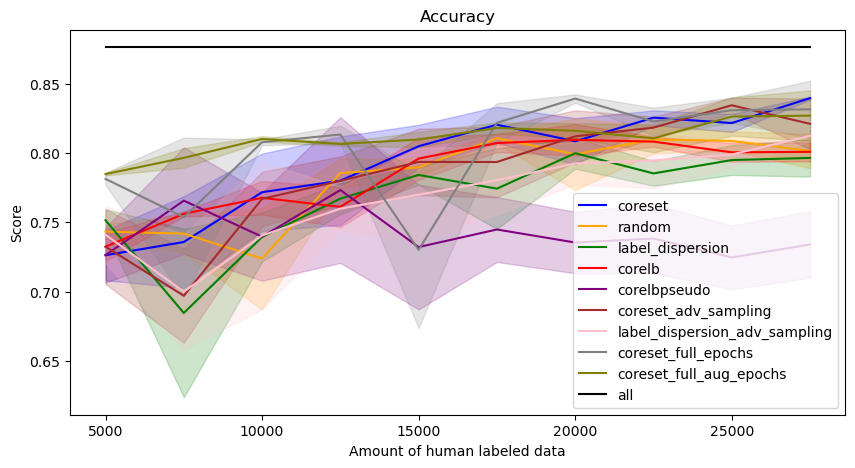

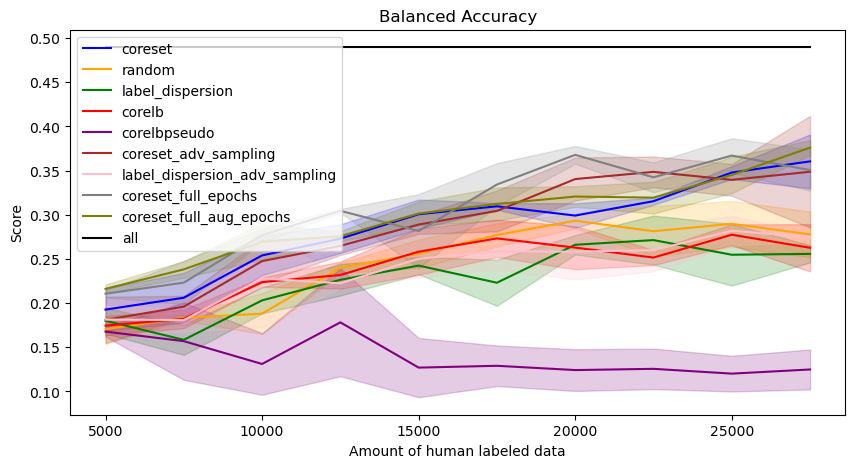

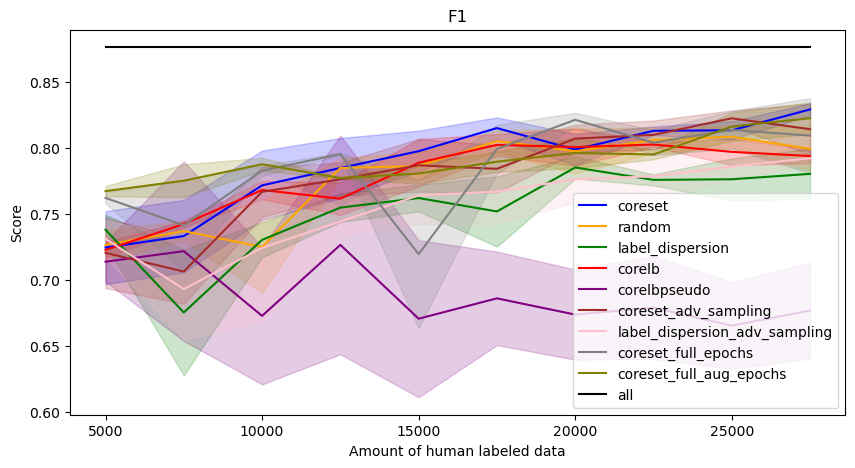

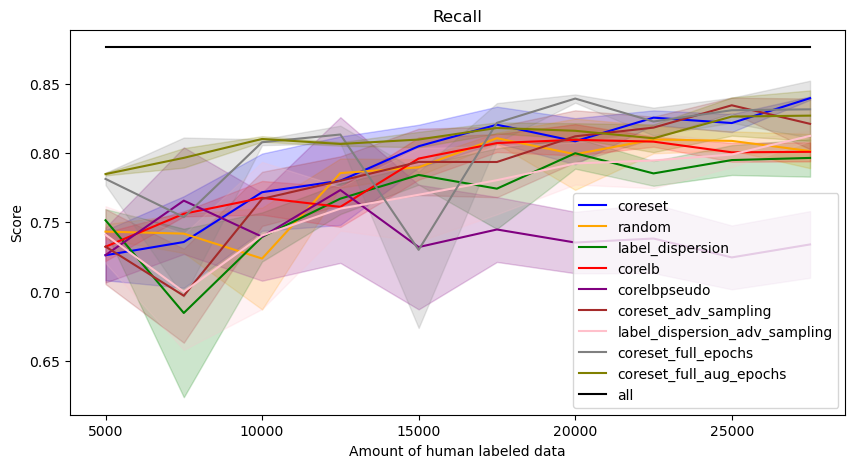

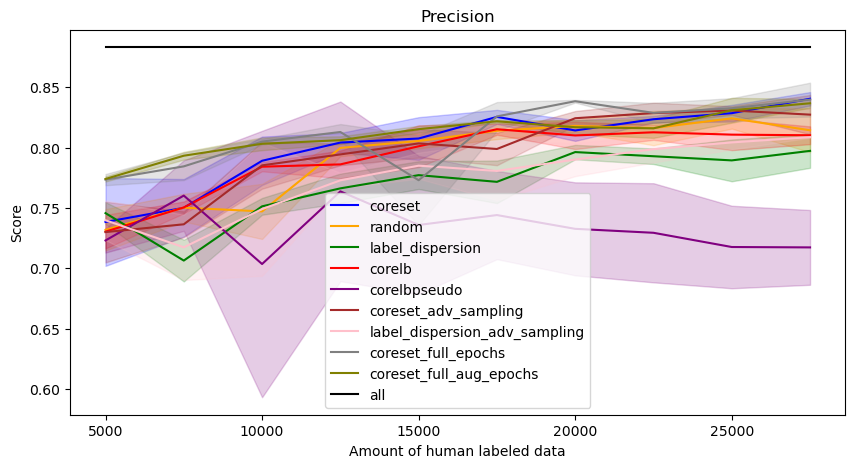

In [20]:
title = ['Accuracy','Balanced Accuracy','F1','Recall','Precision']
color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
sampling_strat = ['coreset','random','label_dispersion','corelb','corelbpseudo','coreset_adv_sampling','label_dispersion_adv_sampling','coreset_full_epochs','coreset_full_aug_epochs']
color_map = dict(zip(sampling_strat, color))

for index, name in enumerate(['acc','bal_acc','f1','recall','precision']):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    x = np.arange(5000,29000,2500)

    for k,v in results_all.items():
        if k == 'all' or k == 'corelbpseudo_human_labeled':
            continue

        ax.plot(x,v[name]['avg'], label=k, color=color_map[k])
        ax.fill_between(x, np.array(v[name]['avg'])-np.array(v[name]['std']), np.array(v[name]['avg'])+np.array(v[name]['std']), alpha=0.2, color=color_map[k])

    ax.plot(x,results_all['all'][name]['avg'], label='all', color='black')
    ax.fill_between(x, np.array(results_all['all'][name]['avg'])-np.array(results_all['all'][name]['std']), np.array(results_all['all'][name]['avg'])+np.array(results_all['all'][name]['std']), alpha=0.1)

    ax.legend()
    ax.set_title(title[index])
    ax.set_ylabel('Score')
    ax.set_xlabel('Amount of human labeled data')
    plt.savefig(f'plots/{name}.png')
    plt.show()

Text(0.5, 0, 'Amount of human labeled data')

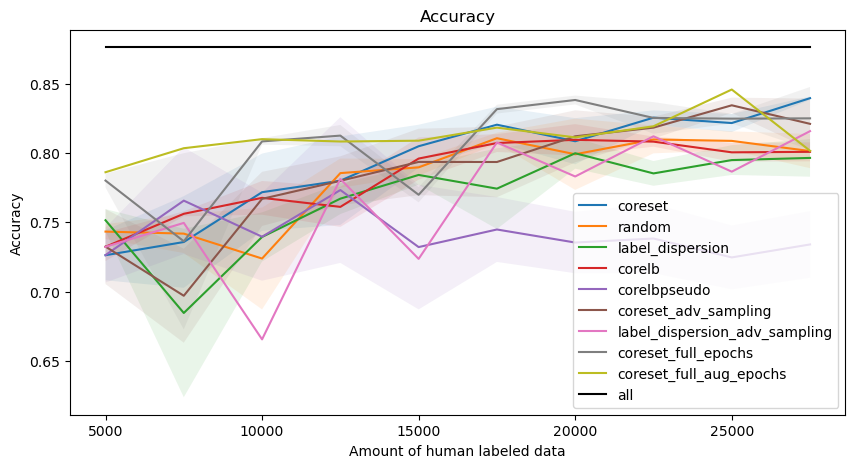

In [224]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.arange(5000,29000,2500)
for k,v in results_all.items():
    if k == 'all' or k == 'corelbpseudo_human_labeled':
        continue
    ax.plot(x,v['acc']['avg'], label=k)
    ax.fill_between(x, np.array(v['acc']['avg'])-np.array(v['acc']['std']), np.array(v['acc']['avg'])+np.array(v['acc']['std']), alpha=0.1)

ax.plot(x,results_all['all']['acc']['avg'], label='all', color='black')
ax.fill_between(x, np.array(results_all['all']['acc']['avg'])-np.array(results_all['all']['acc']['std']), np.array(results_all['all']['acc']['avg'])+np.array(results_all['all']['acc']['std']), alpha=0.1)

ax.legend()
ax.set_title('Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Amount of human labeled data')


Text(0.5, 1.0, 'Balanced Accuracy')

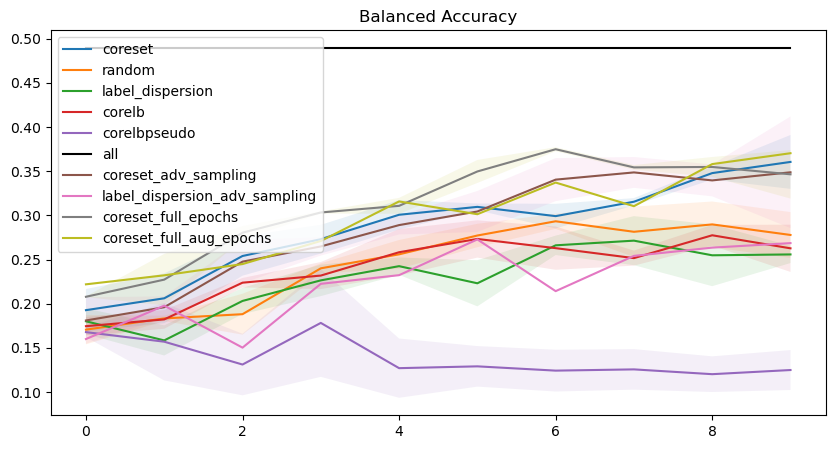

In [225]:
# balanced accuracy:  It is defined as the average of recall obtained on each class.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for k,v in results_all.items():
    if k == 'corelbpseudo_human_labeled':
        continue
    if k == 'all':
        ax.plot(results_all[k]['bal_acc']['avg'], label=k,color='black')
        ax.fill_between(range(10), np.array(results_all[k]['bal_acc']['avg'])-np.array(results_all[k]['bal_acc']['std']), np.array(results_all[k]['bal_acc']['avg'])+np.array(results_all[k]['bal_acc']['std']), alpha=0.1)
    else:
        ax.plot(results_all[k]['bal_acc']['avg'], label=k)
        ax.fill_between(range(10), np.array(results_all[k]['bal_acc']['avg'])-np.array(results_all[k]['bal_acc']['std']), np.array(results_all[k]['bal_acc']['avg'])+np.array(results_all[k]['bal_acc']['std']), alpha=0.1)


ax.legend()
ax.set_title('Balanced Accuracy')

Text(0.5, 1.0, 'F1-score')

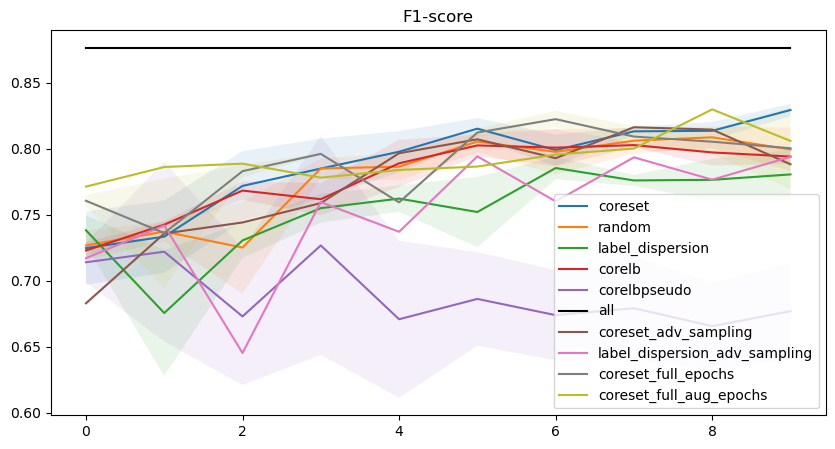

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for k,v in results_all.items():    
    if k == 'corelbpseudo_human_labeled':
        continue
    if k == 'all':
        ax.plot(results_all[k]['f1']['avg'], label=k,color='black')
        ax.fill_between(range(10), np.array(results_all[k]['f1']['avg'])-np.array(results_all[k]['f1']['std']), np.array(results_all[k]['f1']['avg'])+np.array(results_all[k]['f1']['std']), alpha=0.1)
    else:
        ax.plot(results_all[k]['f1']['avg'], label=k)
        ax.fill_between(range(10), np.array(results_all[k]['f1']['avg'])-np.array(results_all[k]['f1']['std']), np.array(results_all[k]['f1']['avg'])+np.array(results_all[k]['f1']['std']), alpha=0.1)


ax.legend()
ax.set_title('F1-score')

Text(0.5, 1.0, 'Recall')

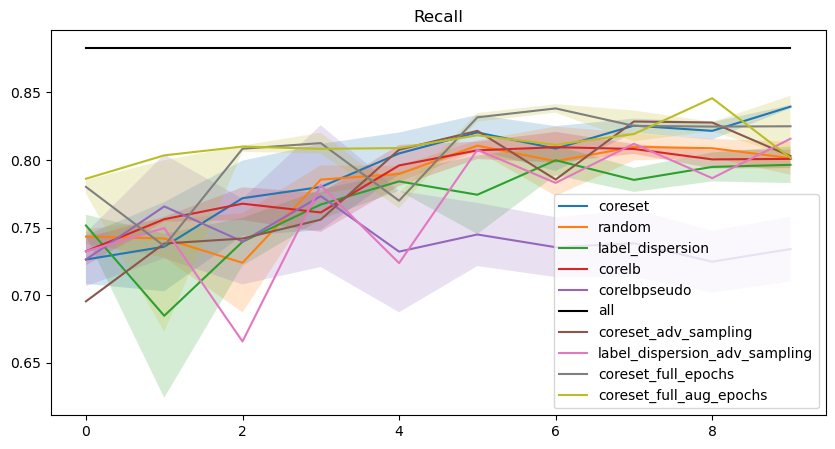

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for k,v in results_all.items():
    if k == 'corelbpseudo_human_labeled':
        continue
    if k == 'all':
        ax.plot(results_all[k]['precision']['avg'], label=k,color='black')
        ax.fill_between(range(10), np.array(results_all[k]['precision']['avg'])-np.array(results_all[k]['precision']['std']), np.array(results_all[k]['precision']['avg'])+np.array(results_all[k]['precision']['std']), alpha=0.2)
    else:
        ax.plot(results_all[k]['recall']['avg'], label=k)
        ax.fill_between(range(10), np.array(results_all[k]['recall']['avg'])-np.array(results_all[k]['recall']['std']), np.array(results_all[k]['recall']['avg'])+np.array(results_all[k]['recall']['std']), alpha=0.2)

ax.legend()
ax.set_title('Recall')

Text(0.5, 1.0, 'Precision')

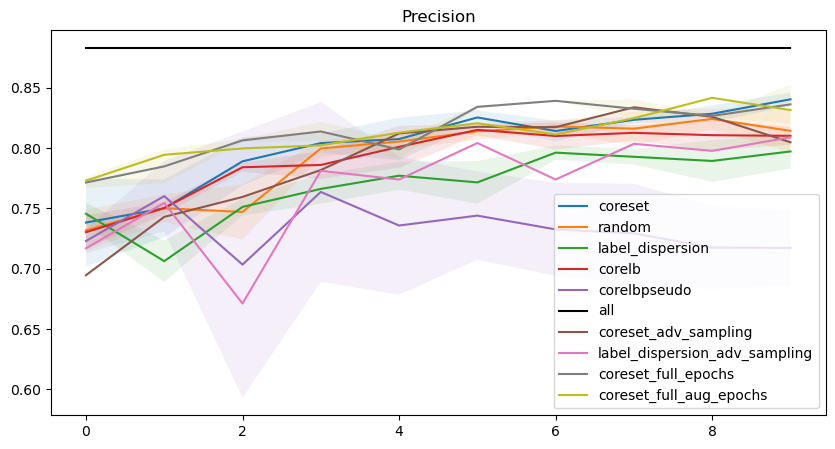

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for k,v in results_all.items():
    if k == 'corelbpseudo_human_labeled':
        continue
    if k == 'all':
        ax.plot(results_all[k]['precision']['avg'], label=k,color='black')
        ax.fill_between(range(10), np.array(results_all[k]['precision']['avg'])-np.array(results_all[k]['precision']['std']), np.array(results_all[k]['precision']['avg'])+np.array(results_all[k]['precision']['std']), alpha=0.1)
    else:
        ax.plot(results_all[k]['precision']['avg'], label=k)
        ax.fill_between(range(10), np.array(results_all[k]['precision']['avg'])-np.array(results_all[k]['precision']['std']), np.array(results_all[k]['precision']['avg'])+np.array(results_all[k]['precision']['std']), alpha=0.1)

ax.legend()
ax.set_title('Precision')

## Snapshot Serengeti 10

In [57]:
def get_ss10_results(rnd_ids):
    random_results_per_id = []
    for rnd_id in rnd_ids:
        random_results = {'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
        for i in range(10):
            results = read_results(f'SnapshotSerengeti10_mobyv2al_{rnd_id}',cycle=i)
            random_results['true_label'].append(results[0])
            random_results['pred_label'].append(results[1])

        random_history = {'acc':[],'bal_acc':[],'f1':[],'recall':[],'precision':[]}
        for i in range(10):
            x = accuracy_score(random_results['true_label'][i], random_results['pred_label'][i])
            random_history['acc'].append(x)
            x = balanced_accuracy_score(random_results['true_label'][i], random_results['pred_label'][i])
            random_history['bal_acc'].append(x)
            x = f1_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
            random_history['f1'].append(x)
            x = recall_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
            random_history['recall'].append(x)
            x = precision_score(random_results['true_label'][i], random_results['pred_label'][i], average='weighted')
            random_history['precision'].append(x)

        random_results_per_id.append(random_history)
    return random_results_per_id

In [58]:
results_all_ss10 = defaultdict(lambda: defaultdict(dict))
for i in ['coreset','random','label_dispersion','corelb','corelbpseudo']:
    for j in ['acc','bal_acc','f1','recall','precision']:
        for k in ['avg','std']:
            results_all[i][j][k] = None

# random 
rnd_ids = [20240705,20240714,20240715]
random_results_per_id = get_ss10_results(rnd_ids)

results_all_ss10['random']['acc']['avg'] = np.mean([i['acc'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['acc']['std'] = np.std([i['acc'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['bal_acc']['std'] = np.std([i['bal_acc'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['precision']['avg'] = np.mean([i['precision'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['precision']['std'] = np.std([i['precision'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['recall']['avg'] = np.mean([i['recall'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['recall']['std'] = np.std([i['recall'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['f1']['avg'] = np.mean([i['f1'] for i in random_results_per_id],axis=0).tolist()
results_all_ss10['random']['f1']['std'] = np.std([i['f1'] for i in random_results_per_id],axis=0).tolist()

# label dispersion
lb_ids = [20240614,20240721,20240718]
lb_results_per_id = get_ss10_results(lb_ids)
results_all_ss10['label_dispersion']['acc']['avg'] = np.mean([i['acc'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['acc']['std'] = np.std([i['acc'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['bal_acc']['std'] = np.std([i['bal_acc'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['precision']['avg'] = np.mean([i['precision'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['precision']['std'] = np.std([i['precision'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['recall']['avg'] = np.mean([i['recall'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['recall']['std'] = np.std([i['recall'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['f1']['avg'] = np.mean([i['f1'] for i in lb_results_per_id],axis=0).tolist()
results_all_ss10['label_dispersion']['f1']['std'] = np.std([i['f1'] for i in lb_results_per_id],axis=0).tolist()

# coreset
coreset_ids = [20240613, 20240716, 20240717]
coreset_results_per_id = get_ss10_results(coreset_ids)
results_all_ss10['coreset']['acc']['avg'] = np.mean([i['acc'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['acc']['std'] = np.std([i['acc'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['bal_acc']['std'] = np.std([i['bal_acc'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['precision']['avg'] = np.mean([i['precision'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['precision']['std'] = np.std([i['precision'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['recall']['avg'] = np.mean([i['recall'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['recall']['std'] = np.std([i['recall'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['f1']['avg'] = np.mean([i['f1'] for i in coreset_results_per_id],axis=0).tolist()
results_all_ss10['coreset']['f1']['std'] = np.std([i['f1'] for i in coreset_results_per_id],axis=0).tolist()

# corelb
corelb_ids = [20240627,20240719,20240720]
corelb_results_per_id = get_ss10_results(corelb_ids)
results_all_ss10['corelb']['acc']['avg'] = np.mean([i['acc'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['acc']['std'] = np.std([i['acc'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['bal_acc']['std'] = np.std([i['bal_acc'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['precision']['avg'] = np.mean([i['precision'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['precision']['std'] = np.std([i['precision'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['recall']['avg'] = np.mean([i['recall'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['recall']['std'] = np.std([i['recall'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['f1']['avg'] = np.mean([i['f1'] for i in corelb_results_per_id],axis=0).tolist()
results_all_ss10['corelb']['f1']['std'] = np.std([i['f1'] for i in corelb_results_per_id],axis=0).tolist()

#corelbpseudo
corelbpseudo_ids = [20240628, 20240724,20240723]
corelbpseudo_results_per_id = get_ss10_results(corelbpseudo_ids)
results_all_ss10['corelbpseudo']['acc']['avg'] = np.mean([i['acc'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['acc']['std'] = np.std([i['acc'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['bal_acc']['avg'] = np.mean([i['bal_acc'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['bal_acc']['std'] = np.std([i['bal_acc'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['precision']['avg'] = np.mean([i['precision'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['precision']['std'] = np.std([i['precision'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['recall']['avg'] = np.mean([i['recall'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['recall']['std'] = np.std([i['recall'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['f1']['avg'] = np.mean([i['f1'] for i in corelbpseudo_results_per_id],axis=0).tolist()
results_all_ss10['corelbpseudo']['f1']['std'] = np.std([i['f1'] for i in corelbpseudo_results_per_id],axis=0).tolist()



In [117]:
results_all_ss10.keys()

dict_keys(['random', 'label_dispersion', 'coreset', 'corelb', 'corelbpseudo'])

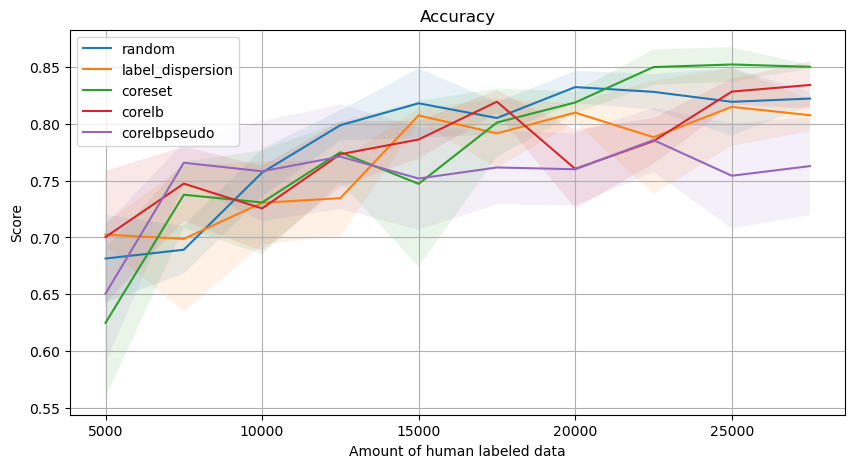

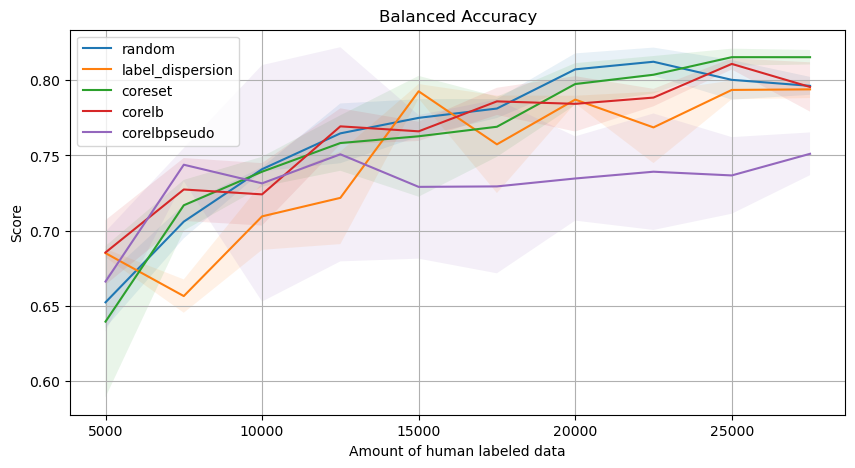

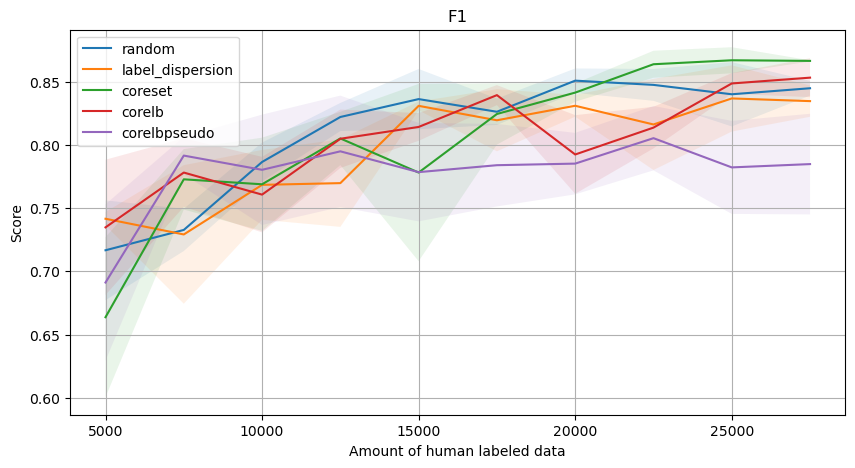

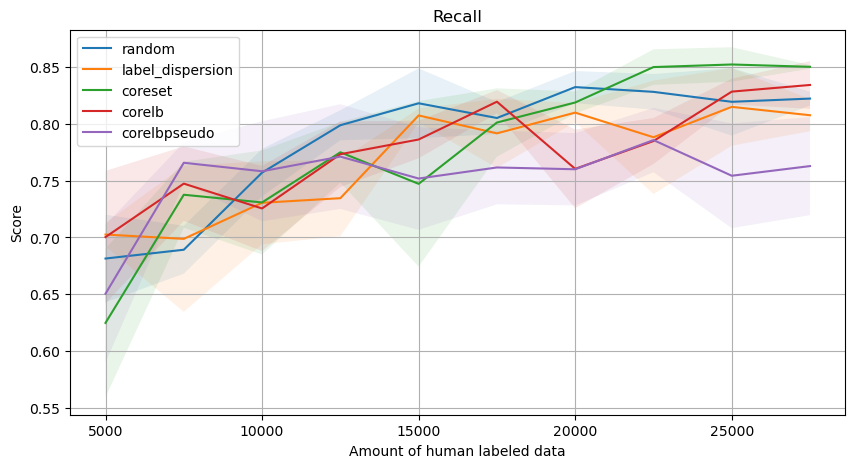

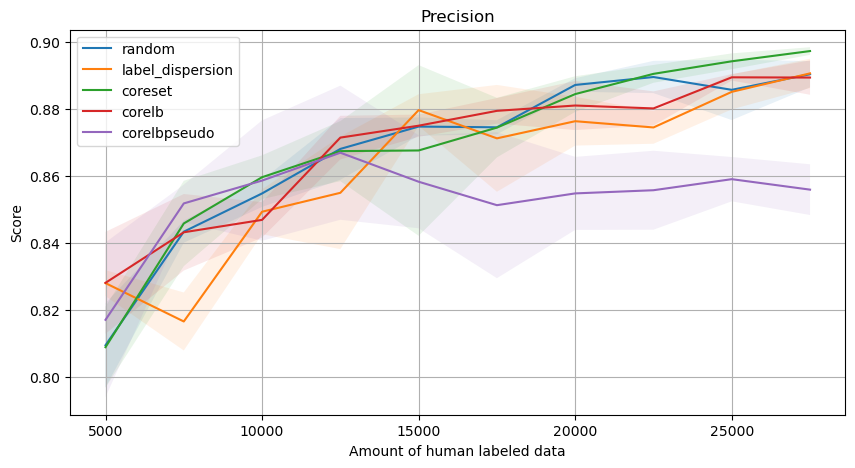

In [61]:
title = ['Accuracy','Balanced Accuracy','F1','Recall','Precision']
x = np.arange(5000,29000,2500)
for i, metric in enumerate(['acc','bal_acc','f1','recall','precision']):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    for k,v in results_all_ss10.items():
        if k == 'all':
            continue
        ax.plot(x,results_all_ss10[k][f'{metric}']['avg'], label=k)
        ax.fill_between(x, np.array(results_all_ss10[k][f'{metric}']['avg'])-np.array(results_all_ss10[k][f'{metric}']['std']), np.array(results_all_ss10[k][f'{metric}']['avg'])+np.array(results_all_ss10[k][f'{metric}']['std']), alpha=0.1)
    ax.legend()
    ax.set_title(f'{title[i]}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Amount of human labeled data')
    ax.grid('both')
    plt.savefig(f'plots/{title[i]}_ss10.png')
    plt.show()

In [ ]:
tmp_path = '/Volumes/data01/waitsun/result_data_analysis/SnapshotSerengetiSmall_mobyv2al_20240713'

with open(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240713_5_high_lb_indices.pkl', 'rb') as f:
    high_lb_indices = pickle.load(f)
with open(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240713_5_pseudo_labels.pkl', 'rb') as f:
    pseudo_labels = pickle.load(f)
with open(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240713_5_labeldispersion_indices.pkl', 'rb') as f:
    label_dispersion_indices = pickle.load(f)
labeled_indices = np.load(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240713_5_labeled_indices.npy')
human_labeled_indices = np.load(f'{tmp_path}/SnapshotSerengetiSmall_mobyv2al_20240713_5_human_labeled_indices.npy')


In [ ]:
len(pseudo_labels) + len(labeled_indices)
len(human_labeled_indices)

19500